# Principal component analysis

We will demonstrate principal component analysis on a data for [abalone](https://en.wikipedia.org/wiki/Abalone). 
The data comes from https://archive.ics.uci.edu/dataset/1/abalone.

In [1]:
try:
    import ucimlrepo
except ImportError:
    !pip install ucimlrepo

In [2]:
#https://archive.ics.uci.edu/dataset/1/abalone

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# # data (as pandas dataframes) 
# X = abalone.data.features 
# y = abalone.data.targets 
  
# metadata 
# print(abalone.metadata) 
  
# variable information 
# print(abalone.variables) 


In [3]:
abalone.data.features 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [4]:
data0 = abalone.data.features.Length
data1 = abalone.data.features.Height

In [5]:
import numpy as np
length = abalone['data']['features']['Length'].values
height = abalone['data']['features']['Height'].values
weight = abalone['data']['features']['Whole_weight'].values

In [6]:
# X = np.column_stack((length, height, weight))
X = np.column_stack((data0.values, data1.values))

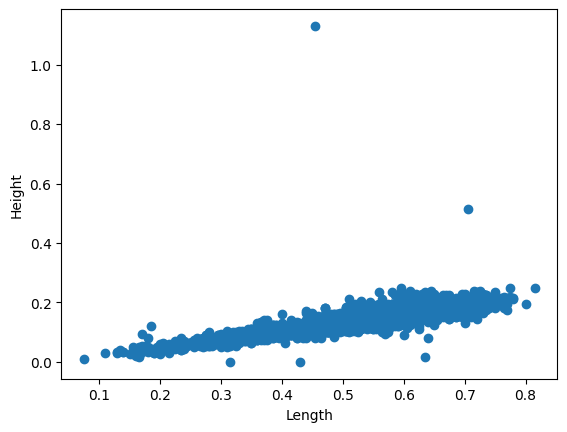

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.xlabel(data0.name)
plt.ylabel(data1.name)
plt.show()

In [8]:
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")

# ax.scatter(X[0], X[1], X[2])

Compute the reduced SVD $U \Sigma V^{H}$ of the measurement matrix $X$:

U: cols are evecs of AA^{H}

Vh: rows are evecs of A^{H}A

We centre the $X$ matrix (make the mean of each column zero):

In [9]:
C = np.identity(X.shape[0]) - np.ones((X.shape[0], X.shape[0]))/ X.shape[0]
Xc = C @ X
print("Test column means:", np.mean(Xc, 0))

Test column means: [1.64792501e-18 3.49187335e-17]


Compute the singular value decompositon:

In [10]:
U, S, Vh = np.linalg.svd(Xc)

(Recall that columns of `U` are the eigenvectors of `A A.T` and the rows of `Vh` ate the eigenvectors of `A.T A`)

We check the singular values:

In [11]:
print(S)

[8.08786269 1.45600719]


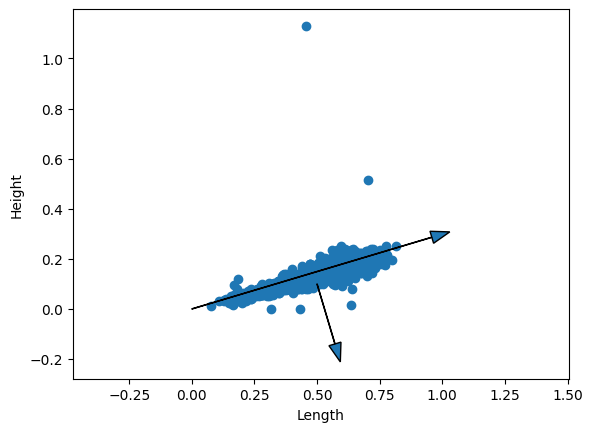

In [16]:
fig, ax = plt.subplots()

plt.scatter(X[:,0], X[:,1])
ax.set_xlabel(data0.name)
ax.set_ylabel(data1.name)
ax.arrow(0, 0, Vh[0, 0], Vh[0, 1], head_width=0.05)
ax.arrow(0.5, 0.1, 0.25*Vh[1, 0], 0.25*Vh[1, 1], head_width=0.05)
ax.set_aspect("equal", adjustable="datalim")
plt.show()

In [17]:
Xnew = X @ Vh

Vh @ Vh[0,:]
print(Vh[1,:])
print(Vh @ Vh[1,:])

[ 0.28624312 -0.95815702]
[1.61810346e-17 1.00000000e+00]


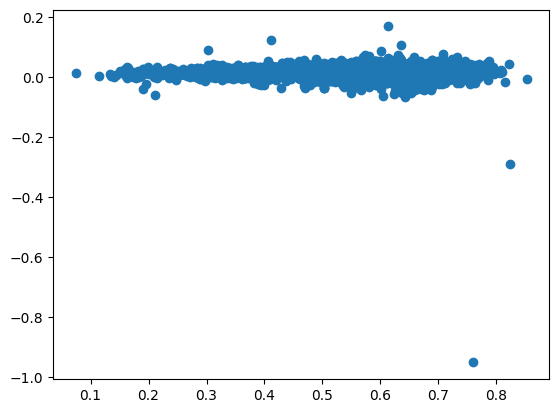

In [18]:
plt.scatter(Xnew[:,0], Xnew[:, 1])
plt.show()